In [1]:
import yt
print(yt.__version__) # 3.6.0 or higher
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import moment
import os
print(os.getcwd())

3.6.0
/home/arne/repos/amrvac/tests/hd/turbulence/2D


## Plot a single image

In [53]:
datfile = '~/uni/astro/archive/output_O/turbulence_0000.dat'
ds = yt.load(datfile)
ad = ds.all_data()

yt : [INFO     ] 2020-12-02 12:01:58,914 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-12-02 12:01:58,914 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 12:01:58,915 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 12:01:58,915 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 12:01:58,916 Parameters: cosmological_simulation   = 0


yt : [WARNING  ] 2020-12-02 12:02:00,322 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 12:02:00,957 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-12-02 12:02:00,957 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-12-02 12:02:00,958 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-12-02 12:02:00,959 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-12-02 12:02:00,960 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



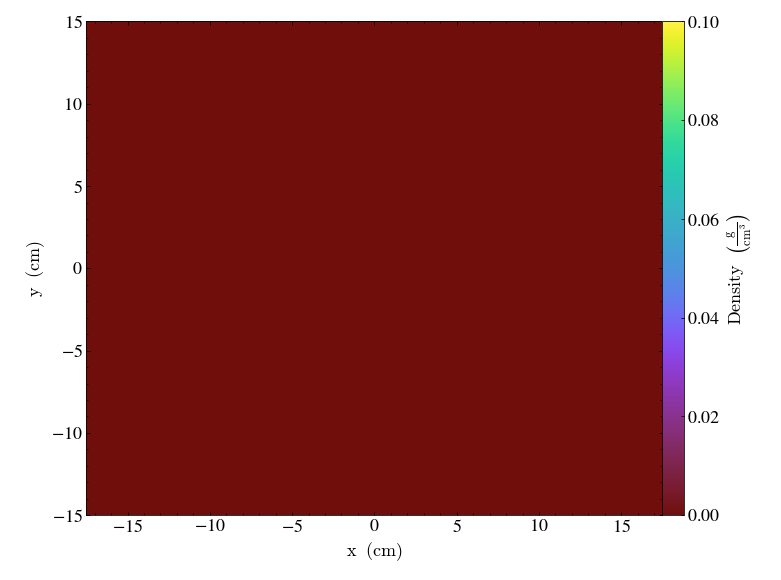

[[[2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]
  ...
  [2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]]

 [[2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]
  ...
  [2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]]

 [[2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]
  ...
  [2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]]

 ...

 [[2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]
  ...
  [2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]]

 [[2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]
  ...
  [2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]]

 [[2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]
  ...
  [2.34167066e-24]
  [2.34167066e-24]
  [2.34167066e-24]]] g/cm**3


In [54]:
p = yt.plot_2d(ds, 'density')
p.set_zlim('density', 0, .1)
p.set_log('density', False)
p.show()
print(ds.covering_grid(level=0, left_edge=[0,0.0,0.0],dims=ds.domain_dimensions)['density'])

## Plot the average velocity

### Axis 0

yt : [INFO     ] 2020-11-29 14:55:49,127 Parameters: current_time              = 150.0
yt : [INFO     ] 2020-11-29 14:55:49,128 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 14:55:49,129 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 14:55:49,129 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 14:55:49,130 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-29 14:55:49,534 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-29 14:55:50,881 Parameters: current_time              = 150.75
yt : [INFO     ] 2020-11-29 14:55:50,882 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 14:55:50,884 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 14:55:50,887 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 14:55:50,888 Parameters: cosmological_simula

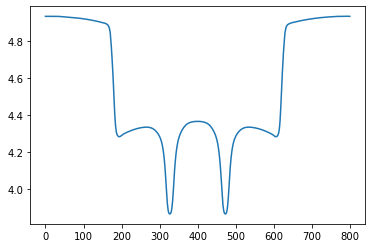

In [7]:
ts = yt.load("./output_I/*.dat")

data = 'm1'
BEGIN = 200
NUM = 10

total = None
for ds in ts[BEGIN:BEGIN+NUM]:
    all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)

    profile = np.squeeze(all_data_level_0[data])[-10,:]
    if total is None:
        total = profile
    else:
        total += profile
        
total /= len(ts[BEGIN:BEGIN+NUM])

plt.plot(total)
plt.show()



### Axis 1

yt : [INFO     ] 2020-11-29 14:56:09,304 Parameters: current_time              = 150.0
yt : [INFO     ] 2020-11-29 14:56:09,305 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 14:56:09,306 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 14:56:09,306 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 14:56:09,307 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-11-29 14:56:09,741 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-11-29 14:56:11,075 Parameters: current_time              = 150.75
yt : [INFO     ] 2020-11-29 14:56:11,076 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-11-29 14:56:11,078 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-11-29 14:56:11,079 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-11-29 14:56:11,081 Parameters: cosmological_simula

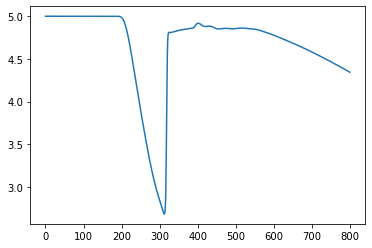

In [8]:
ts = yt.load("./output_I/*.dat")

data = 'm1'
NUM = 50

total = None
for ds in ts[200:200+NUM]:
    all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0],dims=ds.domain_dimensions)

    squeezed = np.squeeze(all_data_level_0[data])
    profile = squeezed[:,squeezed.shape[1]//2]
    if total is None:
        total = profile
    else:
        total += profile
        
total /= len(ts[200:200+NUM])

plt.plot(total)
plt.show()


## Plot slices along the various axes

average along y axis:
[5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         

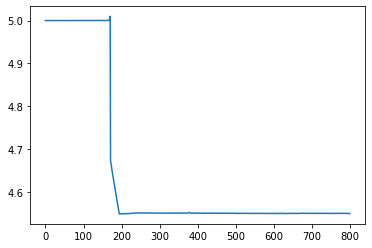

---
skewness along y axis:
[ 1.89175293e-45 -1.07899982e-45 -4.55422001e-47 -3.85006753e-45
  7.63532501e-45 -2.91645243e-45  8.37275832e-46  6.25679764e-45
  7.70889318e-45  6.57559304e-45  1.05482742e-44  2.72797779e-44
  1.63461466e-44  3.89490908e-44  2.18655109e-44 -7.58627956e-45
  6.45473105e-45 -1.52373692e-44  3.77755034e-44  1.03641786e-43
  7.74497661e-44  9.93047673e-44  1.06638813e-44  3.56753073e-44
  1.65528381e-45  3.35085495e-44  1.62571641e-43  2.14799787e-43
  1.27427076e-43 -4.38361192e-44  1.30220915e-43  9.68717628e-44
  1.49541317e-43  9.97321633e-44  1.10891754e-43  1.69560617e-43
  9.78316523e-44  1.83526308e-43  3.29704509e-43  4.07558900e-43
  2.91951777e-43  2.95980510e-43  2.96134653e-43  2.07357140e-43
  1.10022949e-43  2.04869835e-43  3.10774719e-43  3.52037703e-43
  3.57495761e-43  2.25446152e-43  2.86190689e-43  4.49678429e-43
  5.60559673e-43  4.20925536e-43  4.14067932e-43  3.68462673e-43
  2.17409705e-43  3.80671486e-43  5.09433299e-43  3.69809671e-4

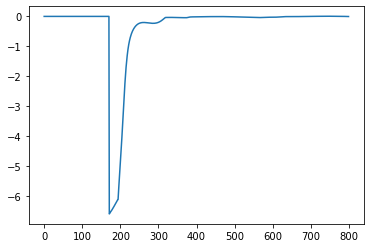

---



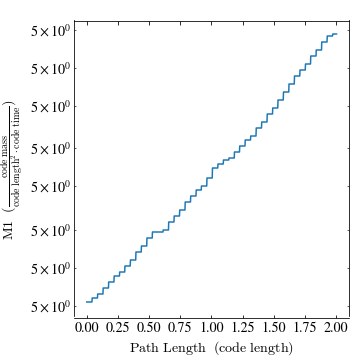

In [10]:
all_data_level_0 = ds.covering_grid(level=0, left_edge=[0,0.0,0.0],dims=ds.domain_dimensions)

print('average along y axis:')

print(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.plot(np.average(np.squeeze(all_data_level_0['m1']), axis=1))
plt.show()
print('---')


print('skewness along y axis:')
print(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.plot(moment(np.squeeze(all_data_level_0['m1']), axis=1, moment=3))
plt.show()
print('---')


p = yt.LinePlot(ds, ['m1'], (0, 0.5, 0), (2, 0.5, 0), 1000)
p.show()

In [18]:
p = yt.SlicePlot(ds, 'y', 'm1')
p.show()

yt : [INFO     ] 2020-11-29 15:14:41,513 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-29 15:14:41,514 ylim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 15:14:41,515 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-11-29 15:14:41,517 ylim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 15:14:41,519 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800


KeyboardInterrupt: 

yt : [INFO     ] 2020-11-29 14:58:53,477 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:58:53,478 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:58:53,479 xlim = 0.000000 35.000000
yt : [INFO     ] 2020-11-29 14:58:53,479 ylim = 0.000000 30.000000
yt : [INFO     ] 2020-11-29 14:58:53,481 Making a fixed resolution buffer of (('amrvac', 'm1')) 800 by 800
yt : [WARNING  ] 2020-11-29 14:58:54,282 Plot image for field ('amrvac', 'm1') has both positive and negative values. Min = -0.915418, Max = 5.154242.
yt : [WARNING  ] 2020-11-29 14:58:54,283 Switching to symlog colorbar scaling unless linear scaling is specified later
C:\Users\semvi\anaconda3\lib\site-packages\yt\visualization\base_plot_types.py:220: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(



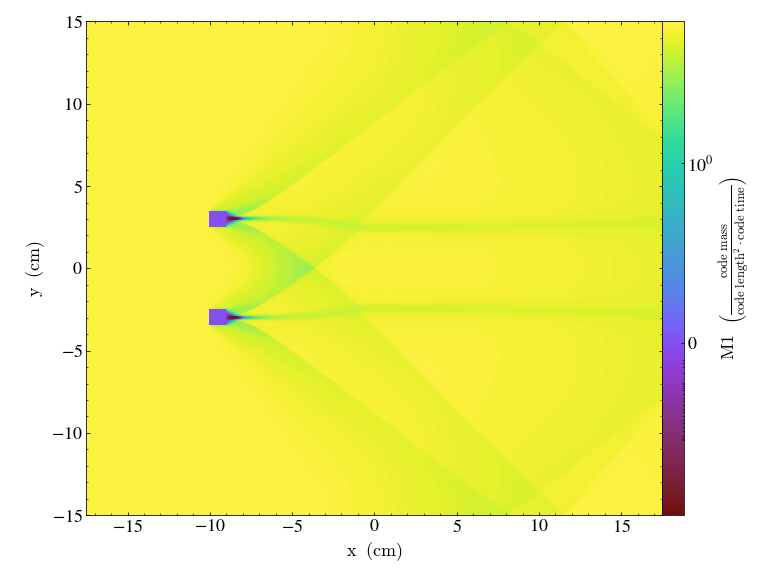

In [13]:
p = yt.SlicePlot(ds, 'z', 'm1')
p.show()

## Energy spectrum of Y at X = 26

TODO
* also use m2?
* average/filter data
* plot dashed lines

In [2]:
ts = yt.load("output/*.dat")
data = 'm1'
U_in = 5
dt = 0.75
X, X_max = 26, 35
X_index = int( 800 * X / X_max)

r = range(400)
d = []
for I in r:
    ds = ts[I]
    sl = np.average(np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=ds.domain_dimensions)[data])[X_index,400:401],axis=0)
    d.append(sl)

fourier = np.fft.fft(d)
for i in range(len(fourier)): fourier[i] *= i
e = np.square(np.absolute(fourier))
f = np.linspace(0.2, e.size/U_in, e.size) # scale x-axis values
plt.loglog(f[1:f.size//2],e[1:f.size//2])
plt.loglog([i / 100 for i in range(100,1100)], [(i/100) ** (-5/3) for i in range(100,1100)])
plt.ylim(1e-8, 1e8)
plt.show()


yt : [INFO     ] 2020-12-02 10:13:49,971 Parameters: current_time              = 63.63999622371359
yt : [INFO     ] 2020-12-02 10:13:49,972 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:13:49,972 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:13:49,973 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:13:49,973 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:13:50,345 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:13:51,166 Parameters: current_time              = 63.65
yt : [INFO     ] 2020-12-02 10:13:51,166 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:13:51,167 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:13:51,167 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:13:51,168 Parameters: cosmolog

yt : [INFO     ] 2020-12-02 10:14:06,762 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:14:07,144 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:14:08,070 Parameters: current_time              = 63.79
yt : [INFO     ] 2020-12-02 10:14:08,071 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:14:08,071 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:14:08,072 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:14:08,072 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:14:08,475 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:14:09,324 Parameters: current_time              = 63.800000000000004
yt : [INFO     ] 2020-12-02 10:14:09,325 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:14:09,325 Parameters: domai

yt : [INFO     ] 2020-12-02 10:14:26,031 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:14:26,032 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:14:26,032 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:14:26,520 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:14:27,372 Parameters: current_time              = 63.940000000000005
yt : [INFO     ] 2020-12-02 10:14:27,373 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:14:27,373 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:14:27,374 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:14:27,375 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:14:27,868 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:14:28,612 Parameters: 

yt : [INFO     ] 2020-12-02 10:14:44,811 Parameters: current_time              = 64.08
yt : [INFO     ] 2020-12-02 10:14:44,812 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:14:44,812 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:14:44,813 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:14:44,814 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:14:45,285 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:14:45,984 Parameters: current_time              = 64.09
yt : [INFO     ] 2020-12-02 10:14:45,985 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:14:45,985 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:14:45,986 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:14:45,986 Parameters: cosmological_simulat

yt : [WARNING  ] 2020-12-02 10:15:01,657 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:15:02,424 Parameters: current_time              = 64.23
yt : [INFO     ] 2020-12-02 10:15:02,425 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:15:02,425 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:15:02,426 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:15:02,426 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:15:02,850 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:15:03,571 Parameters: current_time              = 64.24
yt : [INFO     ] 2020-12-02 10:15:03,572 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:15:03,572 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:15:03,573 Parameters: domain_ri

yt : [INFO     ] 2020-12-02 10:15:18,425 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:15:18,425 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:15:18,829 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:15:19,533 Parameters: current_time              = 64.38
yt : [INFO     ] 2020-12-02 10:15:19,534 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:15:19,534 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:15:19,535 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:15:19,535 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:15:20,042 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:15:20,751 Parameters: current_time              = 64.39
yt : [INFO     ] 2020-12-02 10:15:20,751 Parameters: domain_dimensions 

yt : [INFO     ] 2020-12-02 10:15:35,577 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:15:35,578 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:15:35,578 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:15:35,579 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:15:35,956 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:15:36,845 Parameters: current_time              = 64.53
yt : [INFO     ] 2020-12-02 10:15:36,845 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:15:36,846 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:15:36,847 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:15:36,847 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:15:37,230 e not found and no parfile passed, c

yt : [INFO     ] 2020-12-02 10:15:53,240 Parameters: current_time              = 64.67
yt : [INFO     ] 2020-12-02 10:15:53,241 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:15:53,241 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:15:53,242 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:15:53,243 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:15:53,623 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:15:54,317 Parameters: current_time              = 64.68
yt : [INFO     ] 2020-12-02 10:15:54,318 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:15:54,318 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:15:54,319 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:15:54,319 Parameters: cosmological_simulat

yt : [WARNING  ] 2020-12-02 10:16:10,506 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:16:11,214 Parameters: current_time              = 64.82000000000001
yt : [INFO     ] 2020-12-02 10:16:11,215 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:16:11,215 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:16:11,216 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:16:11,216 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:16:11,644 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:16:12,358 Parameters: current_time              = 64.83
yt : [INFO     ] 2020-12-02 10:16:12,358 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:16:12,359 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:16:12,359 Parameter

yt : [INFO     ] 2020-12-02 10:16:27,821 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:16:27,822 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:16:28,294 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:16:29,015 Parameters: current_time              = 64.97
yt : [INFO     ] 2020-12-02 10:16:29,016 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:16:29,016 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:16:29,017 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:16:29,017 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:16:29,570 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:16:30,290 Parameters: current_time              = 64.98
yt : [INFO     ] 2020-12-02 10:16:30,291 Parameters: domain_dimensions 

yt : [INFO     ] 2020-12-02 10:16:45,689 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:16:45,689 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:16:45,690 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:16:45,690 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:16:46,224 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:16:47,021 Parameters: current_time              = 65.12
yt : [INFO     ] 2020-12-02 10:16:47,021 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:16:47,022 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:16:47,022 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:16:47,023 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:16:47,391 e not found and no parfile passed, c

yt : [INFO     ] 2020-12-02 10:17:04,181 Parameters: current_time              = 65.26
yt : [INFO     ] 2020-12-02 10:17:04,181 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:17:04,182 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:17:04,182 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:17:04,183 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:17:04,601 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:17:05,458 Parameters: current_time              = 65.27
yt : [INFO     ] 2020-12-02 10:17:05,459 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:17:05,459 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:17:05,460 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:17:05,460 Parameters: cosmological_simulat

yt : [WARNING  ] 2020-12-02 10:17:21,776 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:17:22,586 Parameters: current_time              = 65.41
yt : [INFO     ] 2020-12-02 10:17:22,587 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:17:22,588 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:17:22,588 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:17:22,589 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:17:22,966 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:17:23,674 Parameters: current_time              = 65.42
yt : [INFO     ] 2020-12-02 10:17:23,674 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:17:23,675 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:17:23,676 Parameters: domain_ri

yt : [INFO     ] 2020-12-02 10:17:38,865 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:17:38,865 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:17:39,400 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:17:40,113 Parameters: current_time              = 65.56
yt : [INFO     ] 2020-12-02 10:17:40,114 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:17:40,114 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:17:40,114 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:17:40,115 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:17:40,488 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:17:41,328 Parameters: current_time              = 65.57000000000001
yt : [INFO     ] 2020-12-02 10:17:41,329 Parameters: domain

yt : [INFO     ] 2020-12-02 10:17:57,540 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:17:57,541 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:17:57,541 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:17:57,542 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:17:57,917 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:17:58,717 Parameters: current_time              = 65.71000000000001
yt : [INFO     ] 2020-12-02 10:17:58,717 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:17:58,718 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:17:58,718 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:17:58,719 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:17:59,126 e not found and no parfi

yt : [WARNING  ] 2020-12-02 10:18:14,069 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:18:14,831 Parameters: current_time              = 65.85
yt : [INFO     ] 2020-12-02 10:18:14,832 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:18:14,832 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:18:14,833 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:18:14,833 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:18:15,207 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:18:15,901 Parameters: current_time              = 65.86
yt : [INFO     ] 2020-12-02 10:18:15,902 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:18:15,902 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:18:15,903 Parameters: domain_ri

yt : [INFO     ] 2020-12-02 10:18:30,744 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:18:30,744 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:18:31,250 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:18:31,946 Parameters: current_time              = 66.0
yt : [INFO     ] 2020-12-02 10:18:31,947 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:18:31,947 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:18:31,948 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:18:31,949 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:18:32,325 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:18:32,999 Parameters: current_time              = 66.01
yt : [INFO     ] 2020-12-02 10:18:33,000 Parameters: domain_dimensions  

yt : [INFO     ] 2020-12-02 10:18:47,708 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:18:47,708 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:18:47,709 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:18:47,709 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:18:48,087 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:18:48,862 Parameters: current_time              = 66.15
yt : [INFO     ] 2020-12-02 10:18:48,863 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:18:48,863 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:18:48,864 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:18:48,864 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:18:49,240 e not found and no parfile passed, c

yt : [INFO     ] 2020-12-02 10:19:04,617 Parameters: current_time              = 66.29
yt : [INFO     ] 2020-12-02 10:19:04,617 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:19:04,618 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:19:04,619 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:19:04,619 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:19:04,989 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:19:05,690 Parameters: current_time              = 66.3
yt : [INFO     ] 2020-12-02 10:19:05,691 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:19:05,691 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:19:05,692 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:19:05,693 Parameters: cosmological_simulati

yt : [WARNING  ] 2020-12-02 10:19:20,963 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:19:21,643 Parameters: current_time              = 66.44
yt : [INFO     ] 2020-12-02 10:19:21,644 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:19:21,644 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:19:21,644 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:19:21,645 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:19:22,007 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:19:22,813 Parameters: current_time              = 66.45
yt : [INFO     ] 2020-12-02 10:19:22,814 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:19:22,814 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:19:22,815 Parameters: domain_ri

yt : [INFO     ] 2020-12-02 10:19:37,608 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:19:37,609 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:19:38,018 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:19:38,702 Parameters: current_time              = 66.59
yt : [INFO     ] 2020-12-02 10:19:38,702 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:19:38,703 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:19:38,703 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:19:38,704 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:19:39,206 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:19:39,887 Parameters: current_time              = 66.6
yt : [INFO     ] 2020-12-02 10:19:39,888 Parameters: domain_dimensions  

yt : [INFO     ] 2020-12-02 10:19:54,775 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:19:54,775 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:19:54,775 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:19:54,776 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:19:55,288 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:19:55,968 Parameters: current_time              = 66.74
yt : [INFO     ] 2020-12-02 10:19:55,968 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:19:55,969 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:19:55,969 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:19:55,970 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:19:56,356 e not found and no parfile passed, c

yt : [INFO     ] 2020-12-02 10:20:12,517 Parameters: current_time              = 66.88
yt : [INFO     ] 2020-12-02 10:20:12,517 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:20:12,518 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:20:12,519 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:20:12,519 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:20:12,959 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:20:13,683 Parameters: current_time              = 66.89
yt : [INFO     ] 2020-12-02 10:20:13,683 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:20:13,684 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:20:13,684 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:20:13,685 Parameters: cosmological_simulat

yt : [WARNING  ] 2020-12-02 10:20:29,679 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:20:30,413 Parameters: current_time              = 67.03
yt : [INFO     ] 2020-12-02 10:20:30,414 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:20:30,415 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:20:30,415 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-02 10:20:30,416 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-02 10:20:30,959 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-02 10:20:31,660 Parameters: current_time              = 67.04
yt : [INFO     ] 2020-12-02 10:20:31,660 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-02 10:20:31,661 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-02 10:20:31,661 Parameters: domain_ri

IndexError: list index out of range

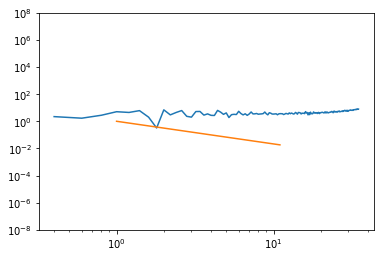

In [13]:
fourier = np.fft.fft(d)
for i in range(len(fourier)): fourier[i] *= i
e = np.square(np.absolute(fourier))
f = np.linspace(0.2, e.size/U_in, e.size) # scale x-axis values
plt.loglog(f[1:f.size//2],e[1:f.size//2])
plt.loglog([i / 100 for i in range(100,1100)], [(i/100) ** (-5/3) for i in range(100,1100)])
plt.ylim(1e-8, 1e8)
plt.show()

## Covergence test for grid sizes 50..800

No data available yet, so I haven't been able to completely test this code, but I think it should work :)

yt : [INFO     ] 2020-12-01 14:43:57,722 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-12-01 14:43:57,723 Parameters: domain_dimensions         = [50 50  1]
yt : [INFO     ] 2020-12-01 14:43:57,724 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:43:57,724 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:43:57,725 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2020-12-01 14:43:57,746 Parameters: current_time              = 30.0
yt : [INFO     ] 2020-12-01 14:43:57,746 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-01 14:43:57,747 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:43:57,747 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:43:57,748 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:43:58,116 e not found and no parfile passed, can not set thermal_pressu

yt : [INFO     ] 2020-12-01 14:44:01,873 Parameters: current_time              = 31.5
yt : [INFO     ] 2020-12-01 14:44:01,873 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-01 14:44:01,874 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:01,874 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:01,875 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:02,031 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:02,193 Parameters: current_time              = 32.25
yt : [INFO     ] 2020-12-01 14:44:02,193 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-01 14:44:02,194 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:02,194 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:02,194 Parameters: cosmological_simulati

yt : [WARNING  ] 2020-12-01 14:44:06,299 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:06,448 Parameters: current_time              = 33.75
yt : [INFO     ] 2020-12-01 14:44:06,448 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-01 14:44:06,448 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:06,449 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:06,450 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:06,531 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:06,679 Parameters: current_time              = 34.5
yt : [INFO     ] 2020-12-01 14:44:06,680 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-01 14:44:06,680 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:06,681 Parameters: domain_rig

yt : [INFO     ] 2020-12-01 14:44:10,588 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:10,738 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:10,893 Parameters: current_time              = 36.0
yt : [INFO     ] 2020-12-01 14:44:10,893 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-01 14:44:10,893 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:10,894 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:10,895 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:10,973 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:11,123 Parameters: current_time              = 36.75
yt : [INFO     ] 2020-12-01 14:44:11,124 Parameters: domain_dimensions         = [800 800   1]
yt : [INFO     ] 2020-12-01 14:44:11,124 Parameters: domain_left_edge   

yt : [INFO     ] 2020-12-01 14:44:15,251 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:15,252 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:15,342 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:15,505 Parameters: current_time              = 38.25
yt : [INFO     ] 2020-12-01 14:44:15,506 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-01 14:44:15,506 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:15,507 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:15,507 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:15,587 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:15,740 Parameters: current_time              = 39.0
yt : [INFO     ] 2020-12-01 14:44:15,740 Parameters: domain_dimensions  

yt : [INFO     ] 2020-12-01 14:44:19,789 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:19,790 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:19,791 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:19,877 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:20,025 Parameters: current_time              = 40.5
yt : [INFO     ] 2020-12-01 14:44:20,026 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-01 14:44:20,026 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:20,027 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:20,027 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:20,197 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:20,342 Parameters: current_time  

yt : [INFO     ] 2020-12-01 14:44:24,194 Parameters: domain_dimensions         = [200 200   1]
yt : [INFO     ] 2020-12-01 14:44:24,194 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:24,195 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:24,195 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:24,274 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:24,421 Parameters: current_time              = 42.75
yt : [INFO     ] 2020-12-01 14:44:24,422 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-01 14:44:24,422 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:24,423 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:24,423 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:24,574 e not found and no parfile passed, c

yt : [INFO     ] 2020-12-01 14:44:28,732 Parameters: current_time              = 45.0
yt : [INFO     ] 2020-12-01 14:44:28,732 Parameters: domain_dimensions         = [200 200   1]
yt : [INFO     ] 2020-12-01 14:44:28,732 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:28,733 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:28,733 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:28,877 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:29,022 Parameters: current_time              = 45.0
yt : [INFO     ] 2020-12-01 14:44:29,022 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-01 14:44:29,023 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:29,023 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:29,024 Parameters: cosmological_simulatio

yt : [WARNING  ] 2020-12-01 14:44:33,118 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:33,341 Parameters: current_time              = 47.25
yt : [INFO     ] 2020-12-01 14:44:33,341 Parameters: domain_dimensions         = [200 200   1]
yt : [INFO     ] 2020-12-01 14:44:33,342 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:33,342 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:33,343 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:33,428 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:33,583 Parameters: current_time              = 47.25
yt : [INFO     ] 2020-12-01 14:44:33,583 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-01 14:44:33,584 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:33,584 Parameters: domain_ri

yt : [INFO     ] 2020-12-01 14:44:37,643 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:37,663 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:37,812 Parameters: current_time              = 49.5
yt : [INFO     ] 2020-12-01 14:44:37,812 Parameters: domain_dimensions         = [200 200   1]
yt : [INFO     ] 2020-12-01 14:44:37,812 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:37,813 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:37,814 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:37,895 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:38,052 Parameters: current_time              = 49.5
yt : [INFO     ] 2020-12-01 14:44:38,052 Parameters: domain_dimensions         = [400 400   1]
yt : [INFO     ] 2020-12-01 14:44:38,053 Parameters: domain_left_edge    

yt : [INFO     ] 2020-12-01 14:44:42,146 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:42,146 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:42,167 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:42,315 Parameters: current_time              = 51.75
yt : [INFO     ] 2020-12-01 14:44:42,315 Parameters: domain_dimensions         = [200 200   1]
yt : [INFO     ] 2020-12-01 14:44:42,316 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:42,316 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:42,317 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:42,398 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:42,550 Parameters: current_time              = 51.75
yt : [INFO     ] 2020-12-01 14:44:42,550 Parameters: domain_dimensions 

yt : [INFO     ] 2020-12-01 14:44:46,621 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:46,621 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:46,622 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:46,640 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:46,786 Parameters: current_time              = 54.0
yt : [INFO     ] 2020-12-01 14:44:46,786 Parameters: domain_dimensions         = [200 200   1]
yt : [INFO     ] 2020-12-01 14:44:46,787 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:46,787 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:46,787 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:46,869 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:47,026 Parameters: current_time  

yt : [INFO     ] 2020-12-01 14:44:51,061 Parameters: domain_dimensions         = [100 100   1]
yt : [INFO     ] 2020-12-01 14:44:51,061 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:51,062 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:51,062 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:51,080 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:51,234 Parameters: current_time              = 56.25
yt : [INFO     ] 2020-12-01 14:44:51,234 Parameters: domain_dimensions         = [200 200   1]
yt : [INFO     ] 2020-12-01 14:44:51,235 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:51,235 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:51,236 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:51,392 e not found and no parfile passed, c

yt : [INFO     ] 2020-12-01 14:44:55,482 Parameters: current_time              = 58.5
yt : [INFO     ] 2020-12-01 14:44:55,483 Parameters: domain_dimensions         = [100 100   1]
yt : [INFO     ] 2020-12-01 14:44:55,483 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:55,484 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:55,484 Parameters: cosmological_simulation   = 0
yt : [WARNING  ] 2020-12-01 14:44:55,502 e not found and no parfile passed, can not set thermal_pressure.
yt : [INFO     ] 2020-12-01 14:44:55,718 Parameters: current_time              = 58.5
yt : [INFO     ] 2020-12-01 14:44:55,718 Parameters: domain_dimensions         = [200 200   1]
yt : [INFO     ] 2020-12-01 14:44:55,718 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-12-01 14:44:55,719 Parameters: domain_right_edge         = [35. 30.  1.]
yt : [INFO     ] 2020-12-01 14:44:55,719 Parameters: cosmological_simulatio

[[0.13775301 0.16174584 0.01597895 0.00367983]
 [0.12640982 0.15540144 0.03945629 0.01815339]
 [0.13910833 0.16287518 0.01964113 0.01344411]
 [0.12860114 0.15967936 0.04463727 0.05943891]
 [0.1370077  0.1610591  0.01395294 0.01278552]
 [0.12920951 0.15657234 0.01633463 0.03415093]
 [0.1353816  0.15963565 0.00970191 0.03409388]
 [0.13419333 0.1587856  0.00701143 0.01018438]
 [0.13508533 0.15870253 0.00712035 0.02805099]
 [0.13615175 0.16021241 0.01160868 0.01050464]
 [0.13287768 0.15661256 0.00278075 0.01140729]
 [0.13574282 0.15970308 0.01006624 0.01138177]
 [0.1316662  0.15625023 0.00512493 0.02052258]
 [0.13518414 0.15938184 0.00925645 0.02390375]
 [0.13157757 0.15672834 0.00598492 0.01118394]
 [0.13520613 0.15922036 0.00887581 0.00705755]
 [0.13487699 0.15829582 0.00749168 0.00941348]
 [0.13498658 0.15894783 0.00783284 0.00165664]
 [0.13449507 0.15836321 0.00618082 0.00976708]
 [0.13417693 0.15827555 0.00558598 0.00886711]
 [0.13352588 0.15776136 0.00422128 0.00516333]
 [0.1341882  

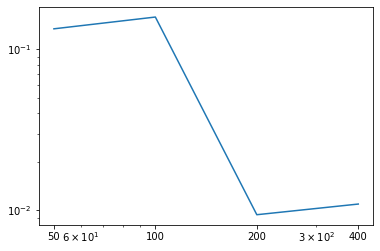

In [21]:
ts = {}
# dims = np.array([200,400,800])
dims = np.array([50,100,200,400,800])
for dim in dims:
    ts[dim] = yt.load(f'~/uni/astro/archive/output2_A{dim if dim > 99 else f"0{dim}"}/*.dat')

start = 40     # first timeframe to check
step = 1      # step between timeframes
data = 'm1'
nb_time_checks = 40
err_approx = np.empty((nb_time_checks,dims.size-1))

# use domain dimensions of the smallest grid, to easily compare the grids
dom_dims = ts[dims[0]][0].domain_dimensions

for i in range(nb_time_checks):
    time = start+step*i
    
    # use grid with highest resolution as a reference
    ds = ts[dims[-1]][time]
    ref = np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=dom_dims)[data])
    ref_norm = np.linalg.norm(ref)
    
    for j in range(dims.size-1):
        ds = ts[dims[j]][time]
        test = np.squeeze(ds.covering_grid(level=0, left_edge=[0,0.0,0.0], dims=dom_dims)[data])
        err_approx[i,j] = np.linalg.norm(test-ref) / ref_norm
        
print(err_approx)   

# plot average error over different times, in function of domain size
plt.loglog(dims[0:dims.size-1],np.average(err_approx,0))
plt.xticks(dims[0:dims.size-1], dims[0:dims.size-1])
plt.show()